In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

In [4]:
ts_raw  = ts.dropna()
ts_sqrt = np.sqrt(ts_raw)
ts_log  = np.log(ts_raw)


In [5]:
diff_raw  = ts_raw.diff().dropna()
diff_sqrt = ts_sqrt.diff().dropna()
diff_log  = ts_log.diff().dropna()

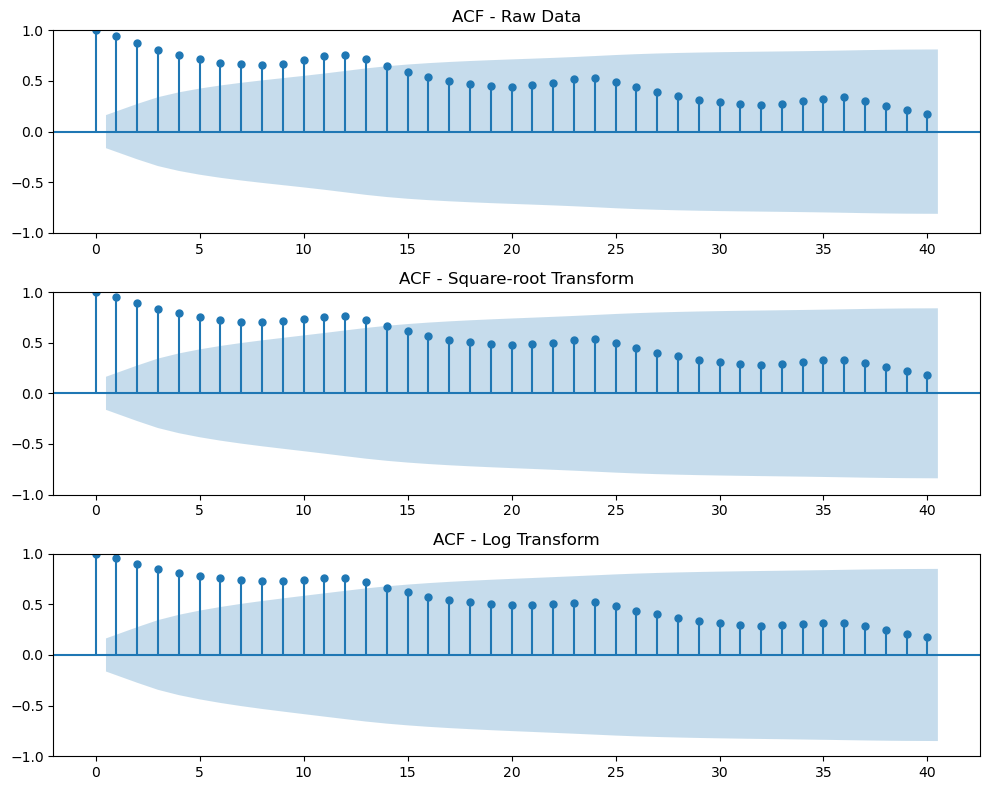

In [ ]:
## ACF plot of raw, sqrt, log data
fig, axes = plt.subplots(3, 1, figsize=(10,8))
plot_acf(ts_raw,  lags=40, ax=axes[0])
axes[0].set_title("ACF - Raw Data")
plot_acf(ts_sqrt, lags=40, ax=axes[1])
axes[1].set_title("ACF - Square-root Transform")
plot_acf(ts_log,  lags=40, ax=axes[2])
axes[2].set_title("ACF - Log Transform")
plt.tight_layout()
plt.show()


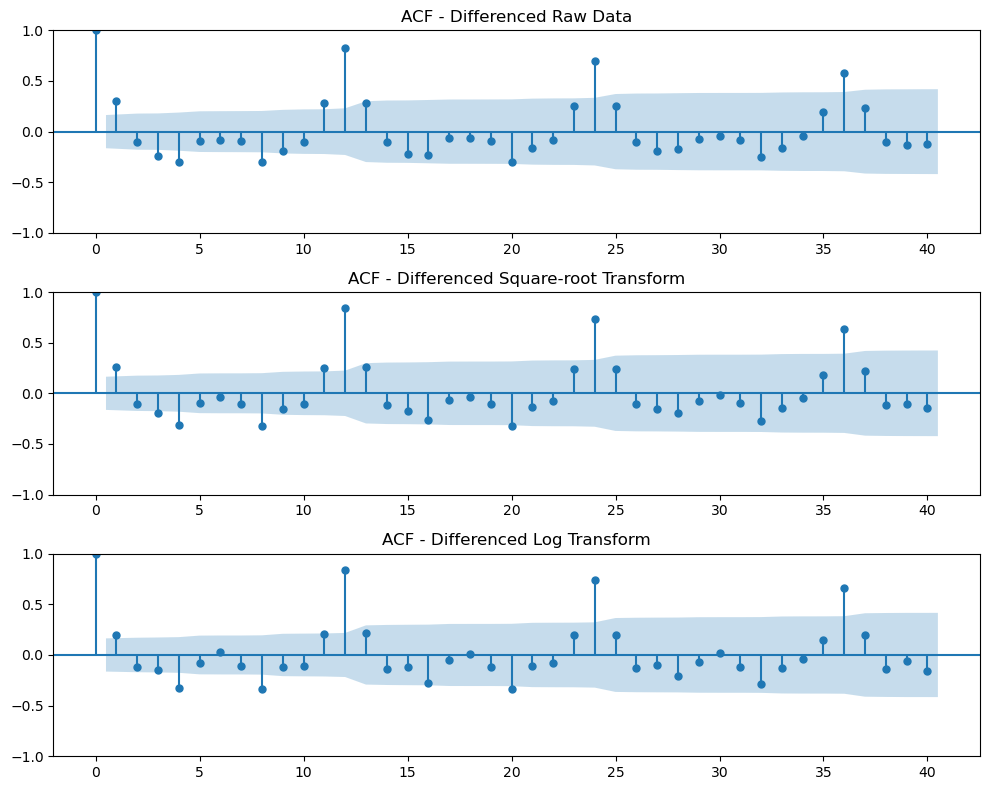

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(10,8))
plot_acf(diff_raw,  lags=40, ax=axes[0])
axes[0].set_title("ACF - Differenced Raw Data")
plot_acf(diff_sqrt, lags=40, ax=axes[1])
axes[1].set_title("ACF - Differenced Square-root Transform")
plot_acf(diff_log,  lags=40, ax=axes[2])
axes[2].set_title("ACF - Differenced Log Transform")
plt.tight_layout()
plt.show()